In [1]:
# importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
# reading the csv file.

uber = pd.read_csv(r"C:\Users\vjain83\Downloads\Upgrad\Uber\Uber Request Data.csv")

In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [4]:
# checking for missing values..

uber.isnull().sum(axis=0)

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

As driver ID and drop time stamp has nulls, so this can be present as when the status was No Cars Available, driver Id and drop time stamp column will be empty obviously.

In [5]:
# datatype of request and drop time stamp is converted to datetime datatype.

uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], dayfirst=True)
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'], dayfirst=True)
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [6]:
# creating new attributes request date, time and drop date time.

uber['request date'] = uber['Request timestamp'].dt.date
uber['request time'] = uber['Request timestamp'].dt.time
uber['drop date'] = uber['Drop timestamp'].dt.date
uber['drop time'] = uber['Drop timestamp'].dt.time
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request date,request time,drop date,drop time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47


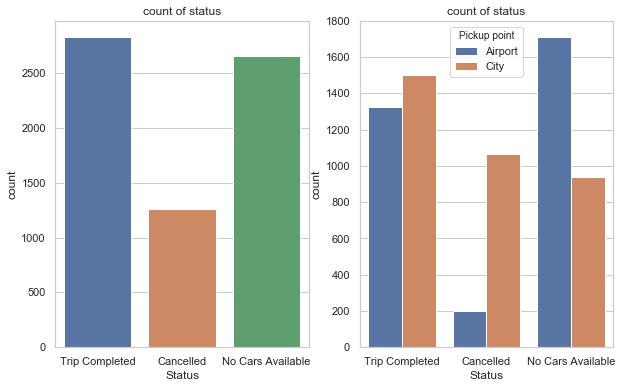

In [7]:
# ploting frequency of requests.

plt.figure(figsize=(10, 6))
 
plt.subplot(121)
sns.countplot('Status', data=uber)
plt.title('count of status')

plt.subplot(122)
sns.countplot('Status', hue='Pickup point', data=uber)
plt.title('count of status')
plt.show()

 By 2nd subplot we can easily see that there are more cancellations in the city and no cars available at airport.
 
 city to airport : cancellation.
 
 airport to city : no cars available.

In [8]:
# creating function to create the time slots.

def slot(x):
    bhour = x.hour
    if 5 <= bhour < 11:
        return 'early morning'
    elif 11 <= bhour < 17:
        return 'afternoon'
    elif 17 <= bhour < 23:
        return 'late evening'
    else:
        return 'night'

In [9]:
uber['slots'] = uber['request time'].apply(slot)

In [10]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request date,request time,drop date,drop time,slots
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,afternoon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,late evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,early morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,late evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,early morning


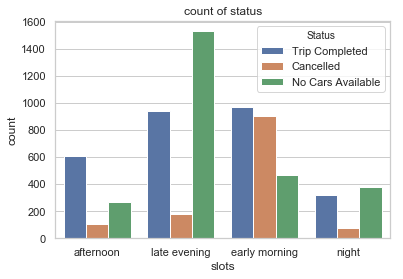

In [11]:
# Frequency od requests, segmented as time slots.

sns.countplot('slots', hue='Status' , data=uber)
plt.title('count of status')
plt.show()

After visualising the graph it's clear that more 'no cars available' in the late evening and cancellations in the early morning.

In [12]:
# to find supply demand gap..
# fetching sum of requests grouping by slot, status, pickup point.

df = pd.DataFrame({'count' : uber.groupby(['slots','Status','Pickup point']).size()}).reset_index()
df

,slots,Status,Pickup point,count
0,afternoon,Cancelled,Airport,55
1,afternoon,Cancelled,City,51
2,afternoon,No Cars Available,Airport,74
3,afternoon,No Cars Available,City,195
4,afternoon,Trip Completed,Airport,274
5,afternoon,Trip Completed,City,332
6,early morning,Cancelled,Airport,32
7,early morning,Cancelled,City,873
8,early morning,No Cars Available,Airport,34
9,early morning,No Cars Available,City,437


In [13]:
# now count_r contains the sum of all the requests grouped by slots and pickup point. 
# eg- in afternoon at airport, demand observed is 403.

df = df.join(df.groupby(['slots', 'Pickup point'])['count'].sum(), on=['slots', 'Pickup point'], rsuffix='_r')
df

,slots,Status,Pickup point,count,count_r
0,afternoon,Cancelled,Airport,55,403
1,afternoon,Cancelled,City,51,578
2,afternoon,No Cars Available,Airport,74,403
3,afternoon,No Cars Available,City,195,578
4,afternoon,Trip Completed,Airport,274,403
5,afternoon,Trip Completed,City,332,578
6,early morning,Cancelled,Airport,32,501
7,early morning,Cancelled,City,873,1845
8,early morning,No Cars Available,Airport,34,501
9,early morning,No Cars Available,City,437,1845


In [14]:
# for fetching the gap ie gap = demand - supply. and supply is trips completed. 
# creating sdg dataframe (supply, demand, gap)

sdg = df.loc[df['Status'] == 'Trip Completed',:]
sdg.rename(columns={'count':'supply','count_r':'demand'}, inplace=True)
sdg

C:\Users\vjain83\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,slots,Status,Pickup point,supply,demand
4,afternoon,Trip Completed,Airport,274,403
5,afternoon,Trip Completed,City,332,578
10,early morning,Trip Completed,Airport,435,501
11,early morning,Trip Completed,City,535,1845
16,late evening,Trip Completed,Airport,453,1983
17,late evening,Trip Completed,City,485,663
22,night,Trip Completed,Airport,165,351
23,night,Trip Completed,City,152,421


In [15]:
# finding gap..

sdg['gap'] = sdg['demand'] - sdg['supply']
sdg

C:\Users\vjain83\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,slots,Status,Pickup point,supply,demand,gap
4,afternoon,Trip Completed,Airport,274,403,129
5,afternoon,Trip Completed,City,332,578,246
10,early morning,Trip Completed,Airport,435,501,66
11,early morning,Trip Completed,City,535,1845,1310
16,late evening,Trip Completed,Airport,453,1983,1530
17,late evening,Trip Completed,City,485,663,178
22,night,Trip Completed,Airport,165,351,186
23,night,Trip Completed,City,152,421,269


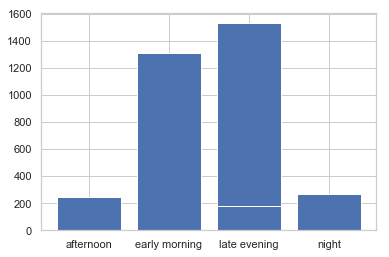

In [16]:
# slot v/s gap 

plt.bar(sdg['slots'], sdg['gap'])
plt.show()

This shows that highest supply demand gap exists in the late evening and early morning.

In [17]:
# Now, finding types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

rq_type = sdg.loc[sdg['slots'].isin(['early morning','late evening']),:]
rq_type

,slots,Status,Pickup point,supply,demand,gap
10,early morning,Trip Completed,Airport,435,501,66
11,early morning,Trip Completed,City,535,1845,1310
16,late evening,Trip Completed,Airport,453,1983,1530
17,late evening,Trip Completed,City,485,663,178


In [18]:
rq_type['labels'] = rq_type['slots']+"-"+rq_type['Pickup point']
rq_type.set_index('labels', inplace=True)

C:\Users\vjain83\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
rq_type = rq_type.drop(['supply', "demand"], axis = 1)
rq_type

,slots,Status,Pickup point,gap
labels,,,,
early morning-Airport,early morning,Trip Completed,Airport,66
early morning-City,early morning,Trip Completed,City,1310
late evening-Airport,late evening,Trip Completed,Airport,1530
late evening-City,late evening,Trip Completed,City,178


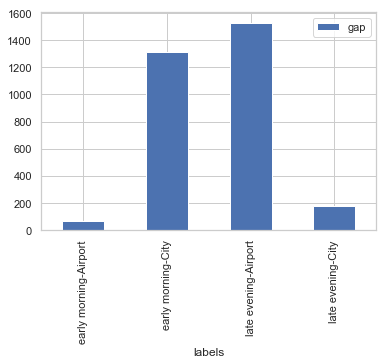

In [20]:
# highest gaps .

rq_type.plot.bar()

This shows clearly that gap of 1310 exists in city in early morning and at Airport in late evenings there is gap of 1530.

## Additional Work

In [21]:
# inflow of cars at airport.

inflow = uber.loc[(uber['Status'] == 'Trip Completed') & (uber['Pickup point'] == 'City'),:]
inflow.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request date,request time,drop date,drop time,slots
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,early morning
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,early morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,2016-07-15,18:50:51,late evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,2016-07-11,07:25:00,early morning
11,1983,City,2.0,Trip Completed,2016-07-12 12:30:00,2016-07-12 12:57:00,2016-07-12,12:30:00,2016-07-12,12:57:00,afternoon


In [22]:
# inflow grouped by slots.

iflow = inflow.groupby(['request date', 'slots'])['slots'].count()
iflow

request date  slots        
2016-07-11    afternoon         77
              early morning    116
              late evening      98
              night             29
2016-07-12    afternoon         66
              early morning     91
              late evening      98
              night             18
2016-07-13    afternoon         68
              early morning     94
              late evening      85
              night             32
2016-07-14    afternoon         87
              early morning    119
              late evening      95
              night             38
2016-07-15    afternoon         34
              early morning    115
              late evening     109
              night             35
Name: slots, dtype: int64

In [23]:
# outflow of cars from airport

outflow = uber.loc[(uber['Status'] == 'Trip Completed') & (uber['Pickup point'] == 'Airport'),:]
outflow.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request date,request time,drop date,drop time,slots
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,afternoon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,late evening
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,late evening
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,2016-07-13,22:28:59,late evening
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,2016-07-14,07:13:15,early morning


In [24]:
# outfow segmented by slots.

oflow = outflow.groupby(['request date', 'slots'])['slots'].count()
oflow

request date  slots        
2016-07-11    afternoon         71
              early morning     83
              late evening      98
              night             29
2016-07-12    afternoon         62
              early morning    113
              late evening      79
              night             35
2016-07-13    afternoon         45
              early morning    109
              late evening     104
              night             40
2016-07-14    afternoon         33
              early morning     50
              late evening      81
              night             27
2016-07-15    afternoon         63
              early morning     80
              late evening      91
              night             34
Name: slots, dtype: int64

C:\Users\vjain83\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\vjain83\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\vjain83\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


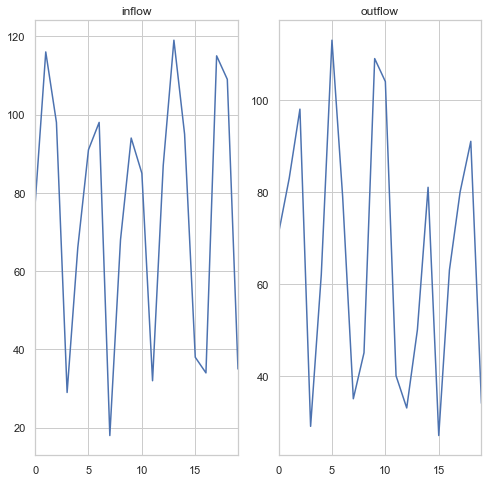

In [25]:
plt.figure(figsize=(8, 8))
 
plt.subplot(121)
sns.tsplot(iflow)
plt.title('inflow')

plt.subplot(122)
sns.tsplot(oflow)
plt.title('outflow')
plt.show()

This is showing an idea that somewhere in the early mornings and late evening, we have lesser inflow and higher outflow especially in the evening which is the root cause for No cars availability at airport in evening.